In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band07_wn_1215_1380',
                          'ng_16',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_16',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_none',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band07_wn_1215_1380',
                          'ng_16',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_16',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_none',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1215

nband = 165

nv = 200

dv = 0.005

tsfc = 294.0

ng = 16

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 16 /)

data wgt
     &     /16 * 1/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 5e-25

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

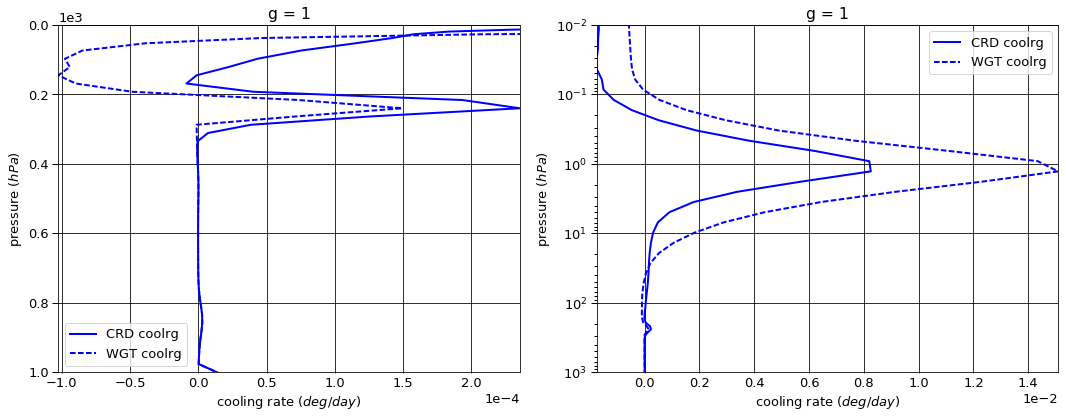

# Figure: cooling rate g-group 2

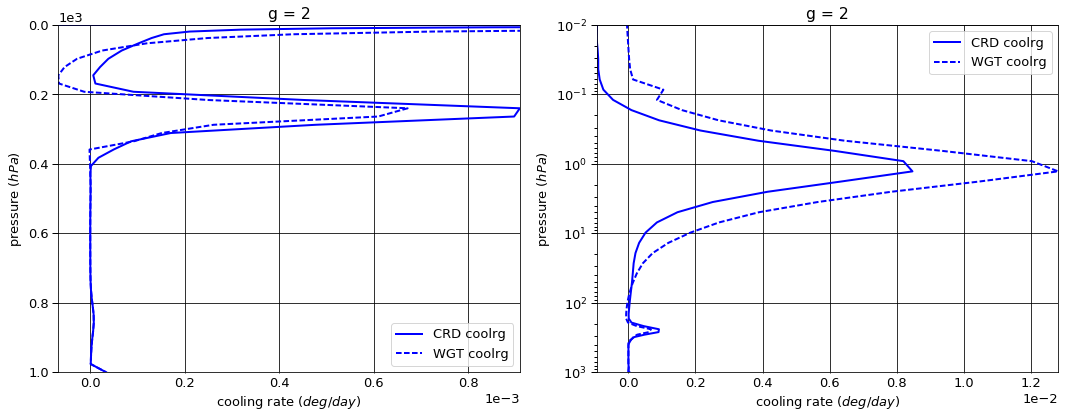

# Figure: cooling rate g-group 3

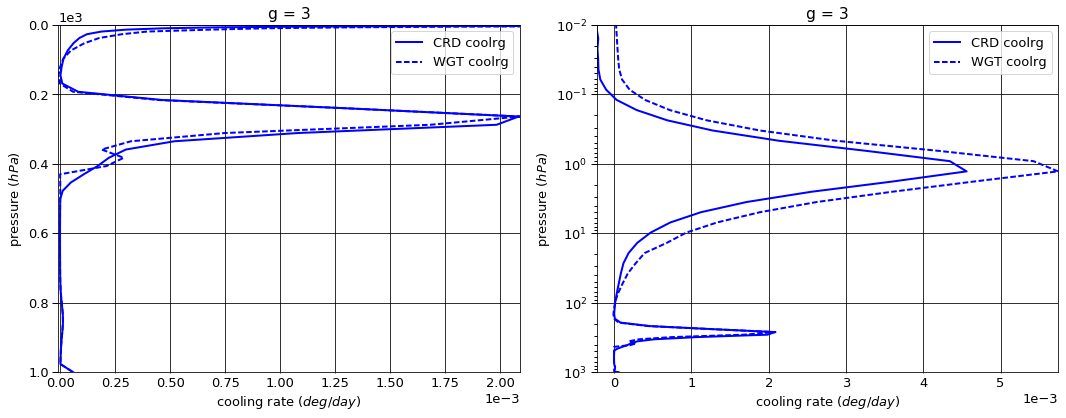

# Figure: cooling rate g-group 4

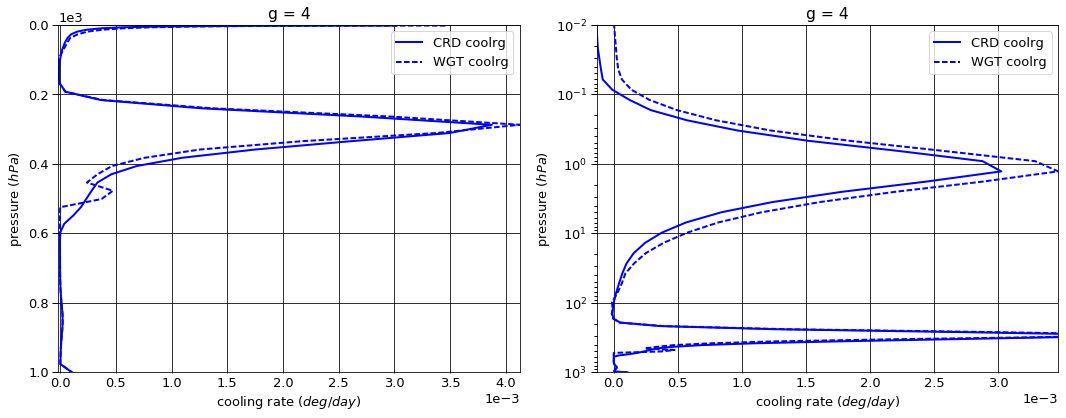

# Figure: cooling rate g-group 5

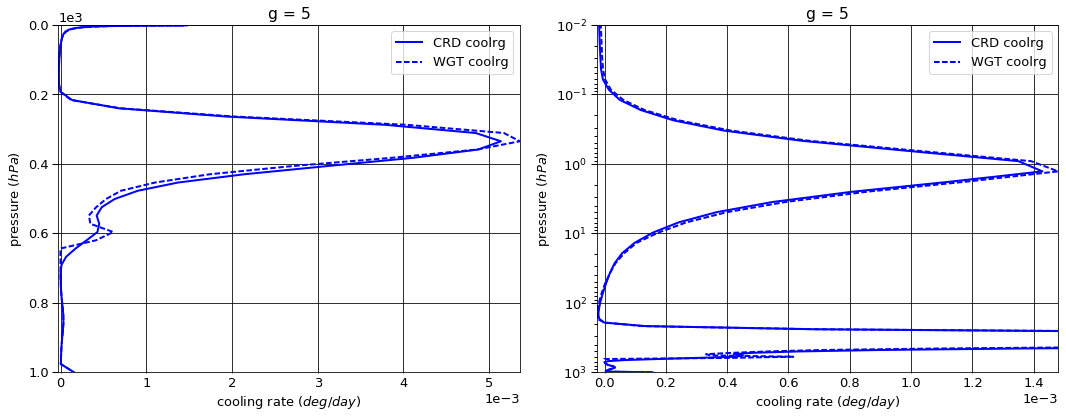

# Figure: cooling rate g-group 6

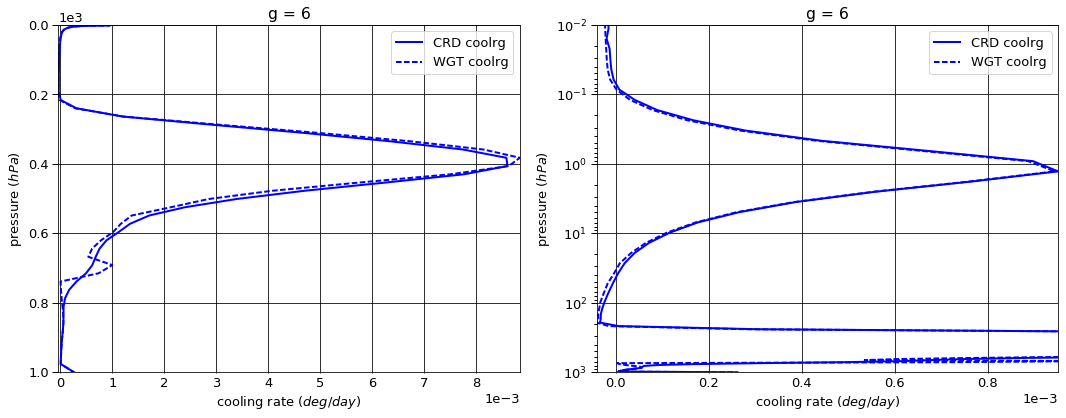

# Figure: cooling rate g-group 7

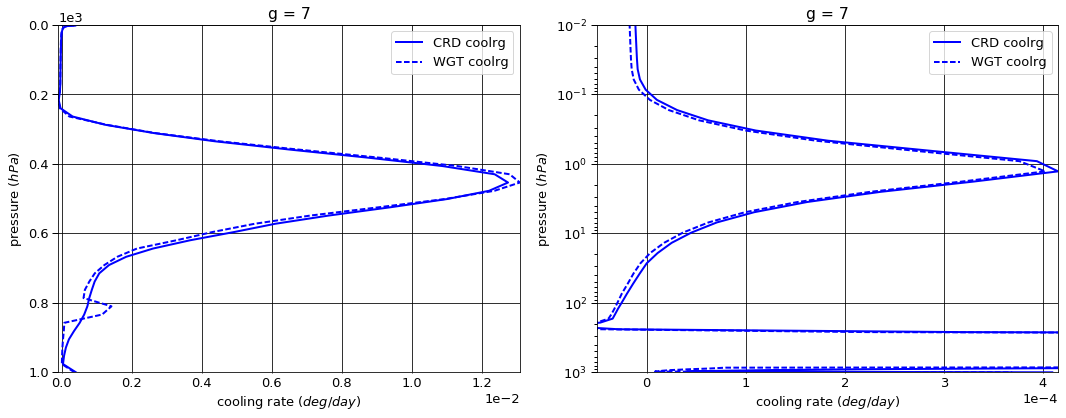

# Figure: cooling rate g-group 8

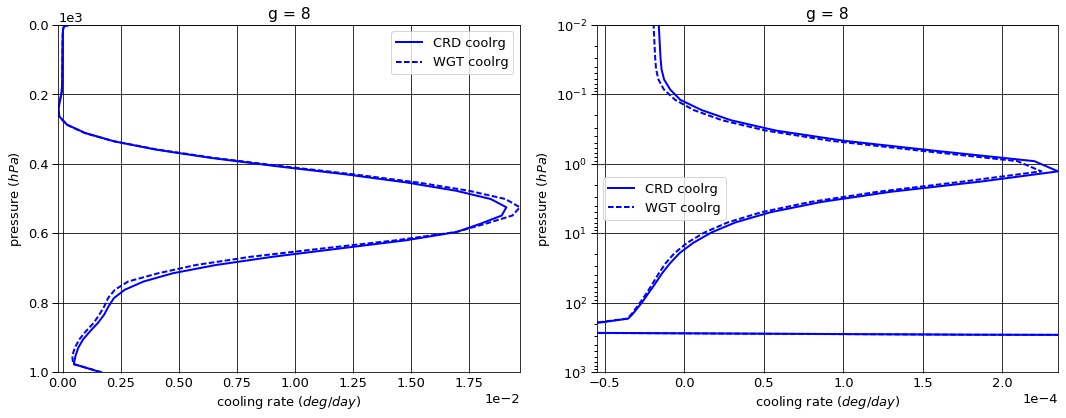

# Figure: cooling rate g-group 9

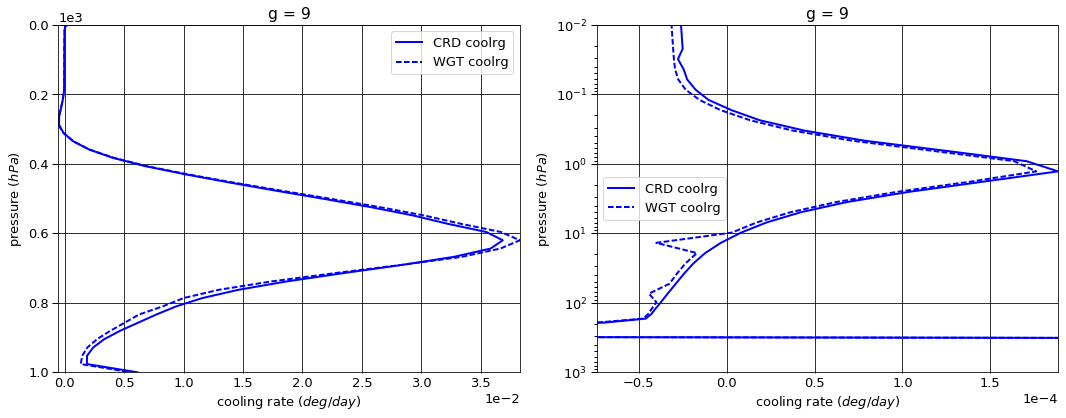

# Figure: cooling rate g-group 10

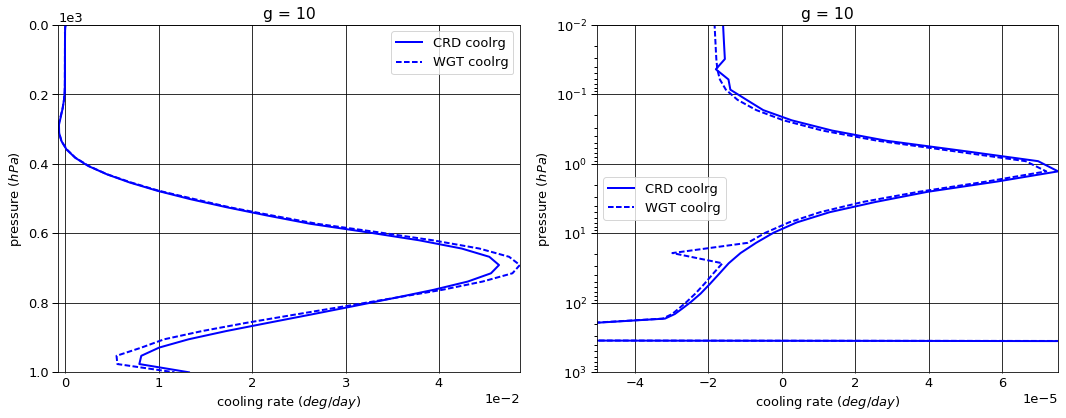

# Figure: cooling rate g-group 11

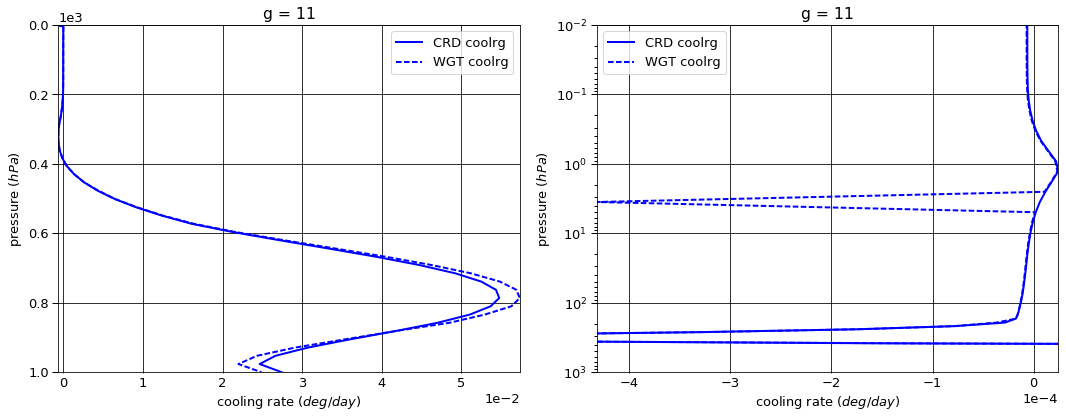

# Figure: cooling rate g-group 12

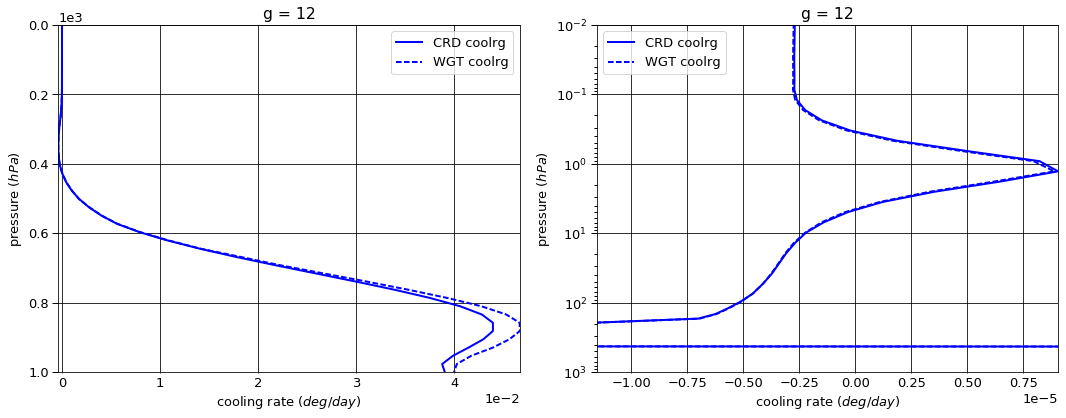

# Figure: cooling rate g-group 13

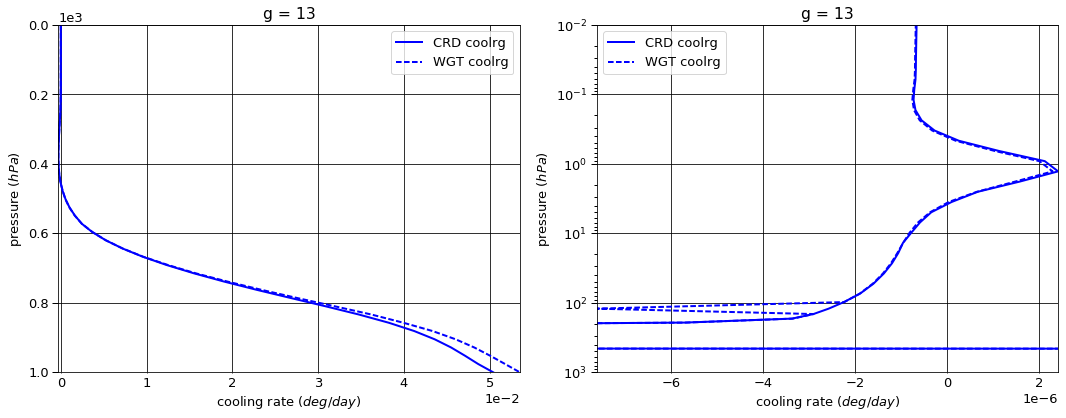

# Figure: cooling rate g-group 14

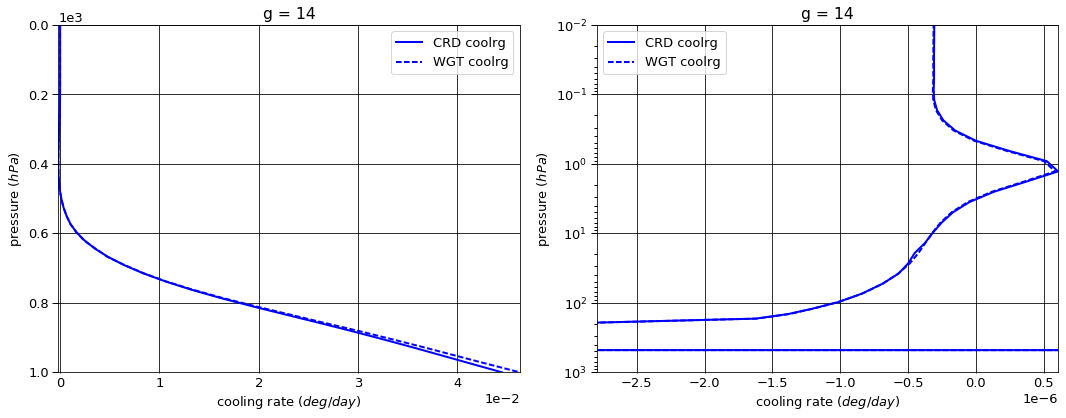

# Figure: cooling rate g-group 15

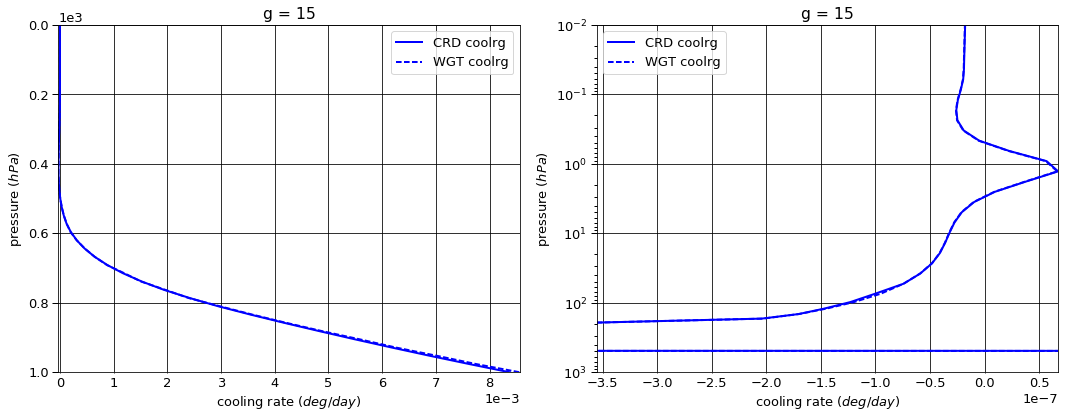

# Figure: cooling rate g-group 16

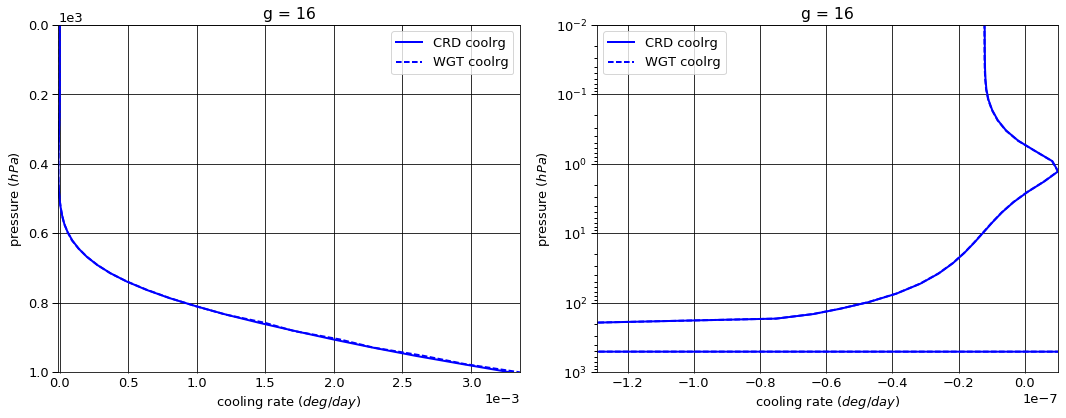

# Figure: cooling rate g-group total

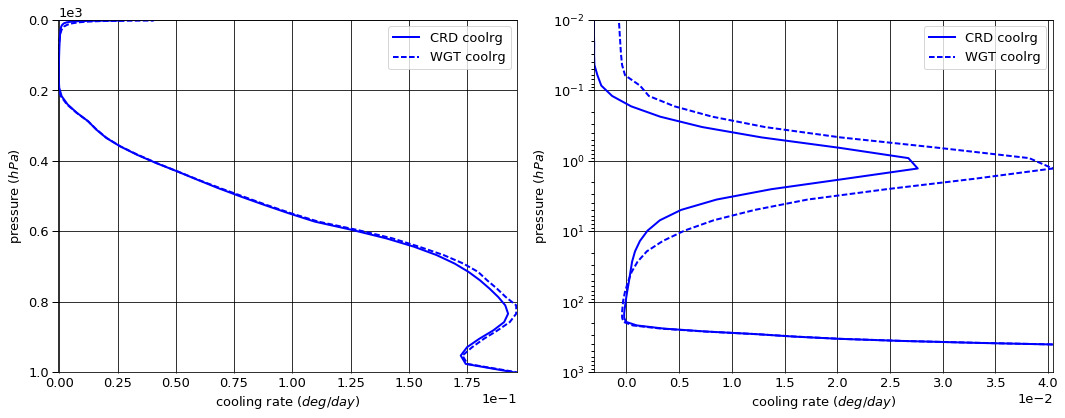

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.005559  0.000000 -0.005559
   1013.0   76    -0.037883  0.037845 -0.000038
2  0.0      1     -0.013408  0.000000 -0.013408
   1013.0   76    -0.092932  0.092839 -0.000094
3  0.0      1     -0.026864  0.000000 -0.026864
   1013.0   76    -0.166302  0.166135 -0.000167
4  0.0      1     -0.057849  0.000000 -0.057849
   1013.0   76    -0.300200  0.299902 -0.000298
5  0.0      1     -0.103307  0.000000 -0.103307
   1013.0   76    -0.443195  0.442756 -0.000439
6  0.0      1     -0.207995  0.000000 -0.207995
   1013.0   76    -0.741887  0.741154 -0.000733
7  0.0      1     -0.359435  0.000000 -0.359435
   1013.0   76    -1.048086  1.046967 -0.001119
8  0.0      1     -0.633388  0.000000 -0.633388
   1013.0   76    -1.527639  1.523547 -0.004092
9  0.0      1     -1.267401  0.000000 -1.267401
   1013.0   76    -2.566716  2.548689 -0.018027
10 0.0      1     -1.790417  0.000000 -1.790417
   1013.0   76    -3.016218  2.963246 -0.052972
11 0.0      1     -2.328985  0.000000 -2.328985
   1013.0   76    -3.364033  3.190940 -0.173093
12 0.0      1     -2.129301  0.000000 -2.129301
   1013.0   76    -2.670261  2.191374 -0.478888
13 0.0      1     -2.596718  0.000000 -2.596718
   1013.0   76    -2.951617  1.781708 -1.169909
14 0.0      1     -2.896901  0.000000 -2.896901
   1013.0   76    -3.106613  1.218479 -1.888133
15 0.0      1     -0.876418  0.000000 -0.876418
   1013.0   76    -0.907213  0.198830 -0.708383
16 0.0      1     -0.804021  0.000000 -0.804021
   1013.0   76    -0.814381  0.070924 -0.743457


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.007560  0.000000 -0.007560
   1013.0   76    -0.037883  0.037845 -0.000038
2  0.0      1     -0.013836  0.000000 -0.013836
   1013.0   76    -0.092932  0.092839 -0.000094
3  0.0      1     -0.025644  0.000000 -0.025644
   1013.0   76    -0.166302  0.166135 -0.000167
4  0.0      1     -0.055056  0.000000 -0.055056
   1013.0   76    -0.300200  0.299902 -0.000298
5  0.0      1     -0.100603  0.000000 -0.100603
   1013.0   76    -0.443195  0.442756 -0.000439
6  0.0      1     -0.203052  0.000000 -0.203052
   1013.0   76    -0.741887  0.741154 -0.000733
7  0.0      1     -0.353804  0.000000 -0.353804
   1013.0   76    -1.048086  1.047053 -0.001032
8  0.0      1     -0.626126  0.000000 -0.626126
   1013.0   76    -1.527639  1.523653 -0.003986
9  0.0      1     -1.253667  0.000000 -1.253667
   1013.0   76    -2.566716  2.551692 -0.015023
10 0.0      1     -1.770102  0.000000 -1.770102
   1013.0   76    -3.016218  2.976577 -0.039642
11 0.0      1     -2.309213  0.000000 -2.309213
   1013.0   76    -3.364033  3.241237 -0.122795
12 0.0      1     -2.114887  0.000000 -2.114887
   1013.0   76    -2.670261  2.278933 -0.391328
13 0.0      1     -2.588553  0.000000 -2.588553
   1013.0   76    -2.951617  1.854034 -1.097583
14 0.0      1     -2.894586  0.000000 -2.894586
   1013.0   76    -3.106613  1.246803 -1.859809
15 0.0      1     -0.876225  0.000000 -0.876225
   1013.0   76    -0.907213  0.201187 -0.706026
16 0.0      1     -0.803966  0.000000 -0.803966
   1013.0   76    -0.814381  0.071641 -0.742740


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.002002  0.000000 -0.002002
   1013.0   76     0.000000  0.000000  0.000000
2  0.0      1     -0.000428  0.000000 -0.000428
   1013.0   76     0.000000  0.000000  0.000000
3  0.0      1      0.001220  0.000000  0.001220
   1013.0   76     0.000000  0.000000  0.000000
4  0.0      1      0.002793  0.000000  0.002793
   1013.0   76     0.000000  0.000000  0.000000
5  0.0      1      0.002703  0.000000  0.002703
   1013.0   76     0.000000  0.000000  0.000000
6  0.0      1      0.004944  0.000000  0.004944
   1013.0   76     0.000000  0.000000  0.000000
7  0.0      1      0.005632  0.000000  0.005632
   1013.0   76     0.000000  0.000087  0.000087
8  0.0      1      0.007262  0.000000  0.007262
   1013.0   76     0.000000  0.000106  0.000106
9  0.0      1      0.013735  0.000000  0.013735
   1013.0   76     0.000000  0.003003  0.003003
10 0.0      1      0.020315  0.000000  0.020315
   1013.0   76     0.000000  0.013330  0.013330
11 0.0      1      0.019772  0.000000  0.019772
   1013.0   76     0.000000  0.050297  0.050297
12 0.0      1      0.014414  0.000000  0.014414
   1013.0   76     0.000000  0.087559  0.087559
13 0.0      1      0.008165  0.000000  0.008165
   1013.0   76     0.000000  0.072326  0.072326
14 0.0      1      0.002314  0.000000  0.002314
   1013.0   76     0.000000  0.028324  0.028324
15 0.0      1      0.000193  0.000000  0.000193
   1013.0   76     0.000000  0.002357  0.002357
16 0.0      1      0.000055  0.000000  0.000055
   1013.0   76     0.000000  0.000716  0.000716

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -1.930807e-03
   1001.112500 75     1.372974e-05
2  0.000312    1     -9.859914e-04
   1001.112500 75     3.344758e-05
3  0.000312    1     -2.510855e-04
   1001.112500 75     5.956600e-05
4  0.000312    1     -1.676295e-04
   1001.112500 75     1.065722e-04
5  0.000312    1     -2.487943e-05
   1001.112500 75     1.569756e-04
6  0.000312    1     -2.229462e-05
   1001.112500 75     2.620999e-04
7  0.000312    1     -1.435481e-05
   1001.112500 75     4.096925e-04
8  0.000312    1     -1.826717e-05
   1001.112500 75     1.636136e-03
9  0.000312    1     -2.870844e-05
   1001.112500 75     6.123098e-03
10 0.000312    1     -1.694171e-05
   1001.112500 75     1.324798e-02
11 0.000312    1     -6.375242e-06
   1001.112500 75     2.746365e-02
12 0.000312    1     -2.616006e-06
   1001.112500 75     3.904119e-02
13 0.000312    1     -6.315147e-07
   1001.112500 75     5.040201e-02
14 0.000312    1     -2.987748e-07
   1001.112500 75     4.448365e-02
15 0.000312    1     -1.573818e-08
   1001.112500 75     8.378980e-03
16 0.000312    1     -1.221529e-08
   1001.112500 75     3.286095e-03


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -7.245460e-04
   1001.112500 75     1.372974e-05
2  0.000312    1     -1.613182e-04
   1001.112500 75     3.344758e-05
3  0.000312    1     -2.413287e-05
   1001.112500 75     5.956600e-05
4  0.000312    1     -3.998703e-05
   1001.112500 75     1.065722e-04
5  0.000312    1     -2.042506e-05
   1001.112500 75     1.569756e-04
6  0.000312    1     -2.919531e-05
   1001.112500 75     2.620999e-04
7  0.000312    1     -1.971161e-05
   1001.112500 75     3.692649e-04
8  0.000312    1     -2.119070e-05
   1001.112500 75     1.670114e-03
9  0.000312    1     -3.397806e-05
   1001.112500 75     5.563191e-03
10 0.000312    1     -1.920490e-05
   1001.112500 75     1.170554e-02
11 0.000312    1     -7.069109e-06
   1001.112500 75     2.490014e-02
12 0.000312    1     -2.664609e-06
   1001.112500 75     3.997625e-02
13 0.000312    1     -6.475876e-07
   1001.112500 75     5.350539e-02
14 0.000312    1     -3.038122e-07
   1001.112500 75     4.628328e-02
15 0.000312    1     -1.592281e-08
   1001.112500 75     8.564740e-03
16 0.000312    1     -1.230986e-08
   1001.112500 75     3.356540e-03


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      1.206261e-03
   1001.112500 75     0.000000e+00
2  0.000312    1      8.246732e-04
   1001.112500 75     0.000000e+00
3  0.000312    1      2.269527e-04
   1001.112500 75     0.000000e+00
4  0.000312    1      1.276424e-04
   1001.112500 75     0.000000e+00
5  0.000312    1      4.454370e-06
   1001.112500 75     0.000000e+00
6  0.000312    1     -6.900694e-06
   1001.112500 75     0.000000e+00
7  0.000312    1     -5.356800e-06
   1001.112500 75    -4.042756e-05
8  0.000312    1     -2.923527e-06
   1001.112500 75     3.397820e-05
9  0.000312    1     -5.269621e-06
   1001.112500 75    -5.599066e-04
10 0.000312    1     -2.263188e-06
   1001.112500 75    -1.542441e-03
11 0.000312    1     -6.938670e-07
   1001.112500 75    -2.563510e-03
12 0.000312    1     -4.860300e-08
   1001.112500 75     9.350520e-04
13 0.000312    1     -1.607291e-08
   1001.112500 75     3.103378e-03
14 0.000312    1     -5.037420e-09
   1001.112500 75     1.799627e-03
15 0.000312    1     -1.846250e-10
   1001.112500 75     1.857604e-04
16 0.000312    1     -9.456400e-11
   1001.112500 75     7.044470e-05

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-16.097967,0.000000,-16.097967
1013.0,76,-23.755176,18.515335,-5.239840



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-15.996879,0.000000,-15.996879
1013.0,76,-23.755176,18.773441,-4.981734



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.101088,0.000000,0.101088
1013.0,76,0.000000,0.258106,0.258106


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.003471
1001.112500,75,0.195105



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.001104
1001.112500,75,0.196527



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.002367
1001.112500,75,0.001422


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.001939,0.001490
2,0.004636,0.003688
3,0.008152,0.006641
4,0.014273,0.012119
5,0.020909,0.017941
6,0.034727,0.030128
7,0.048606,0.042702
8,0.070667,0.062284
9,0.118182,0.104809


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,4.917340e-20
2,2.139073e-20
3,9.305103e-21
4,4.047778e-21
5,1.760809e-21
6,7.659627e-22
7,3.331985e-22
8,1.449434e-22
9,6.305130e-23


In [23]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [16]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [24]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,4.917340e-20,NaN,0.001939,0.001490,0.001939,0.001490,600.0
2,2.139073e-20,0.435006,0.004636,0.003688,0.006576,0.005178,600.0
3,9.305103e-21,0.435006,0.008152,0.006641,0.014727,0.011820,600.0
4,4.047778e-21,0.435006,0.014273,0.012119,0.029000,0.023939,600.0
5,1.760809e-21,0.435006,0.020909,0.017941,0.049909,0.041880,600.0
6,7.659627e-22,0.435006,0.034727,0.030128,0.084636,0.072008,600.0
7,3.331985e-22,0.435006,0.048606,0.042702,0.133242,0.114710,600.0
8,1.449434e-22,0.435006,0.070667,0.062284,0.203909,0.176994,600.0
9,6.305130e-23,0.435006,0.118182,0.104809,0.322091,0.281803,600.0


In [25]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [26]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                     
1     1      0.000312  7.749026e-20  6.191981e-21  12.514615
      2      0.000312  2.000269e-20  1.833126e-21  10.911793
      3      0.000312  4.313659e-21  4.637325e-22   9.302043
      4      0.000312  2.083654e-21  1.237773e-22  16.833897
      5      0.000312  3.226251e-22  4.636148e-23   6.958905
      6      0.000312  1.681930e-22  1.961787e-23   8.573459
      7      0.000312  5.181851e-23  8.009655e-24   6.469506
      8      0.000312  2.715568e-23  3.525223e-24   7.703253
      9      0.000312  1.976596e-23  1.769748e-24  11.168801
      10     0.000312  7.335908e-24  6.322036e-25  11.603711
      11     0.000312  1.946287e-24  2.178243e-25   8.935124
      12     0.000312  7.668373e-25  1.098948e-25   6.977921
      13     0.000312  1.467370e-25  3.506068e-26   4.185230
      14     0.000312  5.945102e-26  1.258303e-26   4.724697
      15     0.000312  1.013007e-26  2.221357e-27   4.560310
      16     0.000312  8.319085e-27  1.956914e-27   4.251125
2     1      0.000750  7.780966e-20  6.197298e-21  12.555418
      2      0.000750  2.010476e-20  1.837024e-21  10.944200
      3      0.000750  4.338087e-21  4.644942e-22   9.339378
      4      0.000750  2.091005e-21  1.240309e-22  16.858737
      5      0.000750  3.246677e-22  4.646277e-23   6.987696
      6      0.000750  1.690218e-22  1.967095e-23   8.592454
      7      0.000750  5.203352e-23  8.023294e-24   6.485306
      8      0.000750  2.722636e-23  3.534194e-24   7.703696
      9      0.000750  1.979512e-23  1.773190e-24  11.163566
      10     0.000750  7.350994e-24  6.338778e-25  11.596862
      11     0.000750  1.952815e-24  2.184214e-25   8.940583
      12     0.000750  7.706595e-25  1.101706e-25   6.995146
      13     0.000750  1.476134e-25  3.519539e-26   4.194113
      14     0.000750  5.967542e-26  1.262897e-26   4.725282
      15     0.000750  1.022408e-26  2.234083e-27   4.576412
      16     0.000750  8.334947e-27  1.961937e-27   4.248325
3     1      0.001052  7.848992e-20  6.207812e-21  12.643733
      2      0.001052  2.032272e-20  1.845115e-21  11.014333
      3      0.001052  4.390203e-21  4.660669e-22   9.419685
      4      0.001052  2.106697e-21  1.245459e-22  16.915023
      5      0.001052  3.290461e-22  4.666989e-23   7.050501
      6      0.001052  1.707937e-22  1.978111e-23   8.634180
      7      0.001052  5.249374e-23  8.051424e-24   6.519808
      8      0.001052  2.737803e-23  3.552852e-24   7.705932
      9      0.001052  1.985740e-23  1.780222e-24  11.154450
      10     0.001052  7.383140e-24  6.373426e-25  11.584256
      11     0.001052  1.966730e-24  2.196618e-25   8.953448
      12     0.001052  7.788215e-25  1.107449e-25   7.032572
      13     0.001052  1.494900e-25  3.547836e-26   4.213554
      14     0.001052  6.015564e-26  1.272538e-26   4.727218
      15     0.001052  1.042594e-26  2.260863e-27   4.611488
      16     0.001052  8.368566e-27  1.972422e-27   4.242786
4     1      0.001476  7.921485e-20  6.218929e-21  12.737698
      2      0.001476  2.055533e-20  1.853732e-21  11.088622
      3      0.001476  4.445920e-21  4.677491e-22   9.504924
      4      0.001476  2.123416e-21  1.251004e-22  16.973696
      5      0.001476  3.337453e-22  4.688643e-23   7.118164
      6      0.001476  1.726901e-22  1.989834e-23   8.678618
      7      0.001476  5.298825e-23  8.081443e-24   6.556781
      8      0.001476  2.754104e-23  3.572751e-24   7.708635
      9      0.001476  1.992401e-23  1.787737e-24  11.144824
      10     0.001476  7.417392e-24  6.410578e-25  11.570551
      11     0.001476  1.981571e-24  2.209907e-25   8.966760
      12     0.001476  7.875500e-25  1.113585e-25   7.072204
      13     0.001476  1.515059e-25  3.578092e-26   4.234266
      14     0.001476  6.067057e-26  1.282860e-26   4.729323
      15     0.001476  1.064366e-26  2.289770e-27   4.648354
      16     0.001476  8.404408e-27  1.983730e-2

# Histogram of wavenumbers in g-group 1

In [27]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [28]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
